In [1]:
!pip install quandl

In [0]:
import quandl
import pandas as pd
import numpy as np
import datetime

from sklearn import svm
from sklearn import preprocessing, cross_validation, svm

In [0]:
quandl.ApiConfig.api_key = '2AP-mzHnGiD3YU6d9mzy'

In [0]:
df = quandl.get("NSE/SONATSOFTW", authtoken="2AP-mzHnGiD3YU6d9mzy")

In [5]:
print(df.tail())

              Open   High     Low   Last   Close  Total Trade Quantity  \
Date                                                                     
2018-08-23  359.35  364.0  352.05  357.5  358.05              171517.0   
2018-08-24  359.00  360.0  348.60  349.5  350.90               91917.0   
2018-08-27  352.90  357.0  350.20  355.8  354.25               89296.0   
2018-08-28  355.00  357.0  349.00  350.7  350.60               70797.0   
2018-08-29  347.65  353.1  345.20  347.8  349.30               99415.0   

            Turnover (Lacs)  
Date                         
2018-08-23           613.73  
2018-08-24           325.23  
2018-08-27           315.82  
2018-08-28           249.86  
2018-08-29           345.95  


In [0]:
df = df[['Close']]

In [0]:
forecast_out = int(30)
df['Prediction'] = df[['Close']].shift(-forecast_out) 

In [0]:
X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

In [0]:
X_forecast = X[-forecast_out:] 
X = X[:-forecast_out]

In [0]:
y = np.array(df['Prediction'])
y = y[:-forecast_out]

In [47]:
from sklearn import linear_model
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)
clf1 = linear_model.Lasso(alpha=0.1)
clf1.fit(X_train,y_train)
# Testing
confidence = clf1.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.3037639548271662


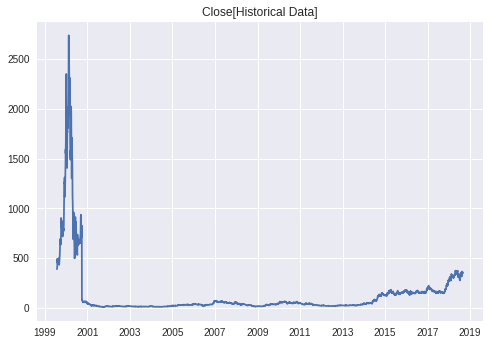

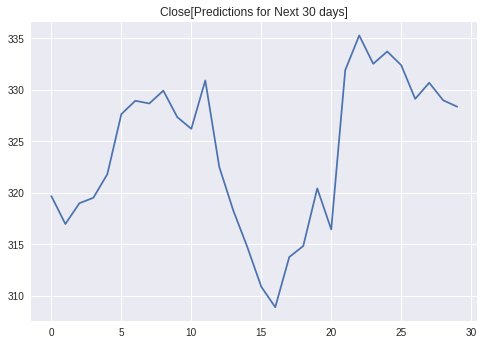

In [56]:
forecast_prediction = clf1.predict(X_forecast)
import matplotlib.pyplot as plt
plt.plot(df['Close'])
plt.title('Close[Historical Data]')
plt.show()
plt.plot(forecast_prediction)
plt.title('Close[Predictions for Next 30 days]')
plt.show()


In [61]:
print(forecast_prediction)
m1 = forecast_prediction

[319.68099793 316.97016011 318.98519768 319.51465542 321.80626849
 327.62799266 328.92303545 328.66179587 329.90848815 327.33589661
 326.20159177 330.89779879 322.49941575 318.28226346 314.74897238
 310.88776004 308.90247697 313.76370642 314.83791606 320.42447262
 316.45011055 331.88974273 335.26381359 332.51032654 333.70540378
 332.3780389  329.11220634 330.66948873 328.97039298 328.35136882]


***LASSO***

ALPHA = 0.1



In [49]:
from sklearn import linear_model
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)
clf2 = linear_model.Lasso(alpha=0.1)
clf2.fit(X_train,y_train)
# Testing
confidence = clf2.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.7822793193990529


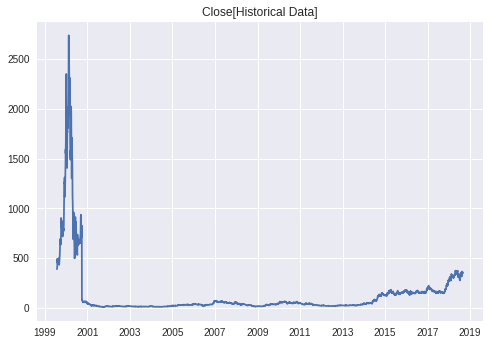

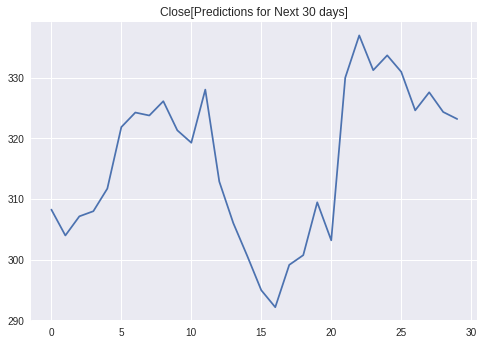

In [50]:
forecast_prediction = clf2.predict(X_forecast)

import matplotlib.pyplot as plt
plt.plot(df['Close'])
plt.title('Close[Historical Data]')
plt.show()

plt.plot(forecast_prediction)
plt.title('Close[Predictions for Next 30 days]')
plt.show()

In [62]:
print(forecast_prediction)
m2 = forecast_prediction

[319.68099793 316.97016011 318.98519768 319.51465542 321.80626849
 327.62799266 328.92303545 328.66179587 329.90848815 327.33589661
 326.20159177 330.89779879 322.49941575 318.28226346 314.74897238
 310.88776004 308.90247697 313.76370642 314.83791606 320.42447262
 316.45011055 331.88974273 335.26381359 332.51032654 333.70540378
 332.3780389  329.11220634 330.66948873 328.97039298 328.35136882]


***LARS Lasso***

Alpha = 0.1

In [52]:
from sklearn import linear_model
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)
clf3 = linear_model.LassoLars(alpha=.1)
clf3.fit(X_train,y_train)
# Testing
confidence = clf3.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.7748122407238615


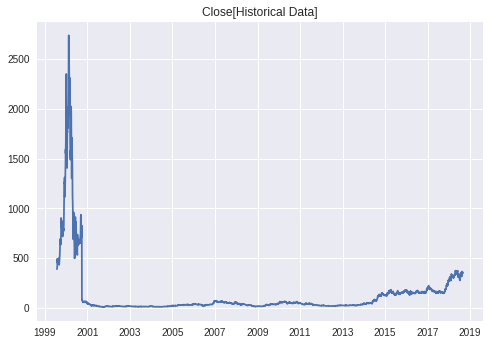

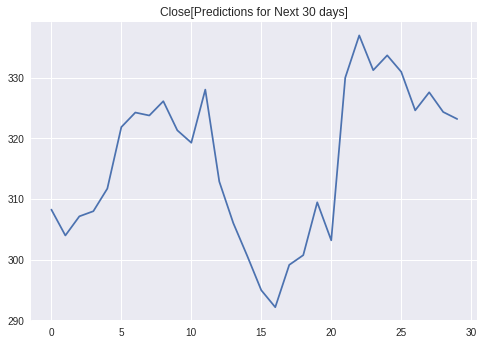

In [53]:
forecast_prediction = clf2.predict(X_forecast)

import matplotlib.pyplot as plt
plt.plot(df['Close'])
plt.title('Close[Historical Data]')
plt.show()

plt.plot(forecast_prediction)
plt.title('Close[Predictions for Next 30 days]')
plt.show()

In [68]:
print(forecast_prediction)
m3 = forecast_prediction

[310.66875134 306.36824752 309.54882847 310.39996985 314.1629107
 324.37660727 326.79564066 326.3028746  328.67711109 323.83904429
 321.77838621 330.60337842 315.32763048 308.4289056  302.963682
 297.27447382 294.45226819 301.48538381 303.09807275 311.87826804
 305.56190306 332.57444267 339.60755829 333.82875629 336.2925866
 333.5599748  327.15401598 330.15540927 326.88523449 325.72051471]


***Linear Regression***

In [64]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)
clf4 = LinearRegression()
clf4.fit(X_train,y_train)
# Testing
confidence = clf4.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.8183368619616136


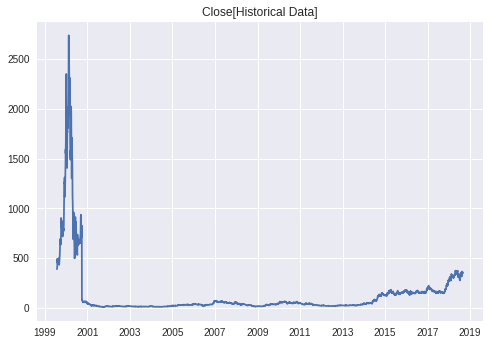

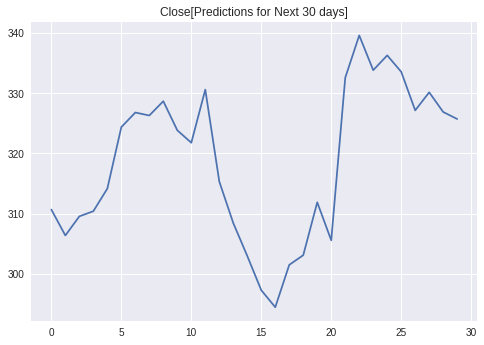

In [65]:
forecast_prediction = clf4.predict(X_forecast)

import matplotlib.pyplot as plt
plt.plot(df['Close'])
plt.title('Close[Historical Data]')
plt.show()

plt.plot(forecast_prediction)
plt.title('Close[Predictions for Next 30 days]')
plt.show()

In [67]:
print(forecast_prediction)
m4 = forecast_prediction

[310.66875134 306.36824752 309.54882847 310.39996985 314.1629107
 324.37660727 326.79564066 326.3028746  328.67711109 323.83904429
 321.77838621 330.60337842 315.32763048 308.4289056  302.963682
 297.27447382 294.45226819 301.48538381 303.09807275 311.87826804
 305.56190306 332.57444267 339.60755829 333.82875629 336.2925866
 333.5599748  327.15401598 330.15540927 326.88523449 325.72051471]


***ENSEMBLED MODEL***

Weighted Average accoriding to their Confidence Scores

In [0]:
final = ((m1*0.1)+(m2*0.2)+(m3*0)+(m4*4))/4


In [79]:
print(final)

[334.64482619 330.14100953 333.4727183  334.36356901 338.29838083
 348.94870672 351.46486832 350.95250929 353.4202477  348.38923654
 346.24350559 355.42071333 339.51508666 332.30007536 326.56985493
 320.59105583 317.61995397 325.0176618  326.71091645 335.91010349
 329.29566135 357.46617338 364.75234431 358.76703078 361.32049188
 358.48832771 351.83743146 354.95562093 351.55801397 350.34686737]


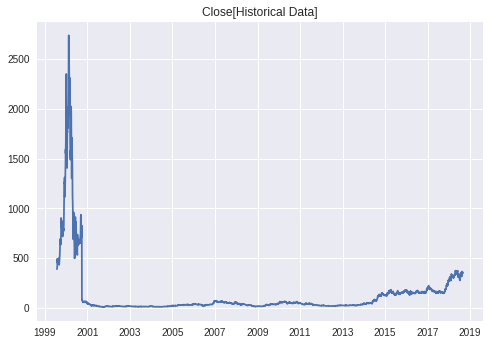

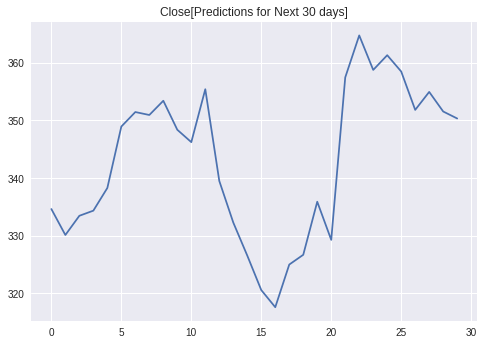

In [80]:
import matplotlib.pyplot as plt
plt.plot(df['Close'])
plt.title('Close[Historical Data]')
plt.show()

plt.plot(final)
plt.title('Close[Predictions for Next 30 days]')
plt.show()

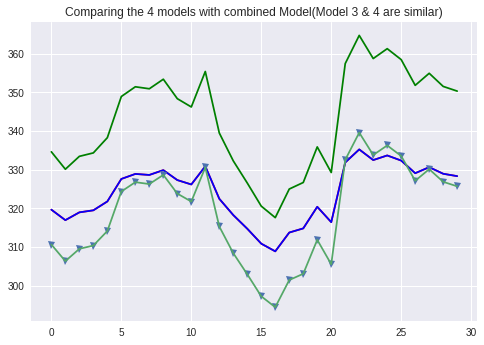

In [91]:
import matplotlib.patches as mpatches


plt.plot(final,'g')
plt.plot(m1,'r')
plt.plot(m2,'b')
plt.plot(m3,'v')
plt.plot(m4)
plt.title('Comparing the 4 models with combined Model(Model 3 & 4 are similar)')
plt.show()